In [1]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 660C-F863

 Directory of c:\Users\LENOVO\Desktop\Projects\delivery\retail sop\project\shop\templates\charts

29-09-2024  07:28    <DIR>          .
02-10-2024  10:58    <DIR>          ..
02-10-2024  18:08             3,836 bar_chart.html
02-10-2024  18:07             3,762 graph.html
15-09-2024  18:41             1,343 graph_filter.html
20-09-2024  22:44         2,550,129 output_final.csv
02-10-2024  18:02             2,209 pie_chart.html
02-10-2024  18:08             4,083 pie_chart_filter.html
20-09-2024  22:38             7,937 try.ipynb
               7 File(s)      2,573,299 bytes
               2 Dir(s)  252,915,527,680 bytes free


In [2]:
import pandas as pd

In [5]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Projects\delivery\retail sop\project\shop\templates\charts\output_final.csv")

In [6]:
df['category'].unique()

array(['Clothing', 'Sports', 'Home & Garden', 'Toys', 'Electronics'],
      dtype=object)

In [7]:
import pandas as pd
import numpy as np
import random
import datetime

# Create a DataFrame with the desired columns and initial values
data = {
    "invoice_no": [],
    "customer_id": [],
    "gender": [],
    "age": [],
    "category": [],
    "quantity": [],
    "price": [],
    "payment_method": [],
    "invoice_date": [],
    "shopping_mall": []
}

# Generate random data for the columns
for i in range(30000):
    data["invoice_no"].append(f"INV{i+1}")
    data["customer_id"].append(f"CUST{i+1}")
    data["gender"].append(np.random.choice(["Male", "Female"], p=[0.6, 0.4]))  # Uneven distribution favoring males
    data["age"].append(np.random.randint(18, 65))
    data["category"].append(np.random.choice(['Electronics', 'Toys', 'Clothing', 'Home & Garden', 'Sports']))
    data["quantity"].append(np.random.randint(1, 10))
    data["price"].append(np.random.uniform(10, 500))
    data["payment_method"].append(np.random.choice(["Credit Card", "Debit Card", "Cash"]))
    data["invoice_date"].append(pd.to_datetime("2023-01-01") + pd.DateOffset(days=np.random.randint(0, (datetime.date.today() - datetime.date(2023, 1, 1)).days)))
    data["shopping_mall"].append(np.random.choice(['Metrocity', 'Istinye Park', 'Viaport Outlet', 'Kanyon',
       'Emaar Square Mall', 'Mall of Istanbul', 'Zorlu Center',
       'Forum Istanbul', 'Metropol AVM', 'Cevahir AVM']))

# Create the DataFrame from the generated data
df = pd.DataFrame(data)

# Print the first few rows of the DataFrame
print(df.head())

  invoice_no customer_id  gender  age       category  quantity       price  \
0       INV1       CUST1    Male   59  Home & Garden         2  119.764977   
1       INV2       CUST2    Male   39         Sports         1  309.014659   
2       INV3       CUST3    Male   44           Toys         1   38.158716   
3       INV4       CUST4  Female   21       Clothing         8  275.994360   
4       INV5       CUST5  Female   31    Electronics         3  314.169506   

  payment_method invoice_date      shopping_mall  
0    Credit Card   2023-07-18       Istinye Park  
1     Debit Card   2023-02-23  Emaar Square Mall  
2     Debit Card   2023-01-19   Mall of Istanbul  
3           Cash   2024-04-30       Istinye Park  
4     Debit Card   2023-05-28       Istinye Park  


In [25]:
df['shopping_mall'].value_counts()

shopping_mall
Mall of Istanbul     3097
Metrocity            3063
Forum Istanbul       3037
Viaport Outlet       3027
Emaar Square Mall    3013
Metropol AVM         2983
Zorlu Center         2962
Istinye Park         2954
Cevahir AVM          2947
Kanyon               2917
Name: count, dtype: int64

In [26]:
df.to_csv('output_final.csv')

In [33]:
from datetime import datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'],dayfirst=True)
from_date = datetime.strptime('2024-03-01','%Y-%m-%d')
to_date = datetime.strptime('2024-04-04','%Y-%m-%d')
tf = df[(df['invoice_date'] >= from_date) & (df['invoice_date'] < to_date) ]
print(len(tf))
tf['gender'].value_counts()

1663


gender
Male      1026
Female     637
Name: count, dtype: int64

In [35]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'],dayfirst=True)
from_date = datetime.strptime('2024-08-01','%Y-%m-%d')
to_date = datetime.strptime('2024-09-30','%Y-%m-%d')
tf = df[(df['invoice_date'] >= from_date) & (df['invoice_date'] < to_date) ]
print(len(tf))
tf['gender'].value_counts()

2359


gender
Male      1412
Female     947
Name: count, dtype: int64

In [35]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Projects\delivery\retail sop\project\shop\templates\charts\output_final.csv")

In [36]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [37]:
X = df[['gender','age','category','quantity','price','payment_method']]
y = df[['shopping_mall']]

In [38]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
X['gender'] = le.fit_transform(df['gender'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18700\2376887000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = le.fit_transform(df['gender'])


In [39]:
X['category'] = le.fit_transform(X['category'])
X['payment_method'] = le.fit_transform(X['payment_method'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18700\2251314022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['category'] = le.fit_transform(X['category'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18700\2251314022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['payment_method'] = le.fit_transform(X['payment_method'])


In [41]:
y['shopping_mall'] = le.fit_transform(y['shopping_mall'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18700\1857450527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['shopping_mall'] = le.fit_transform(y['shopping_mall'])


In [52]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 10.12%


In [60]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = np.array([[10,  5,  3,  0,  0,  0,  0,  0,  5],
       [ 0, 12,  0,  5,  0,  0,  3,  3,  0],
       [ 0,  0, 20,  0,  0,  2,  1,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0, 23,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 23,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 23,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 23]])


Text(58.222222222222214, 0.5, 'Truth')

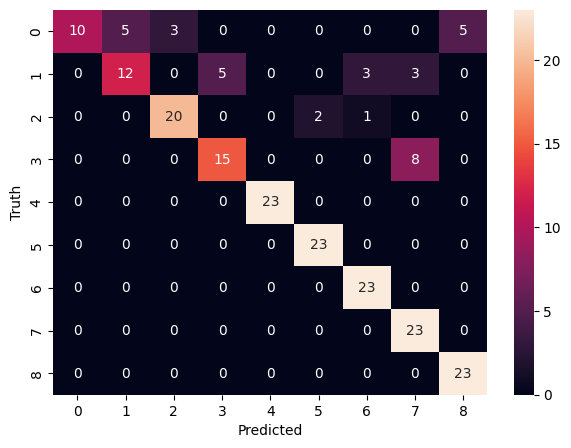

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
df

,invoice_no,customer_id,gender,age,quantity,price,invoice_date,shopping_mall,category_Electronics,category_Home & Garden,category_Sports,category_Toys,payment_method_Credit Card,payment_method_Debit Card
0,INV1,CUST1,Female,38,9,135.574244,14-03-2023,Emaar Square Mall,False,False,False,False,False,True
1,INV2,CUST2,Male,40,1,78.077021,30-04-2024,Zorlu Center,False,False,True,False,False,False
2,INV3,CUST3,Female,52,9,484.126509,19-07-2024,Kanyon,False,False,False,False,True,False
3,INV4,CUST4,Female,23,3,411.528891,31-12-2023,Zorlu Center,False,True,False,False,False,True
4,INV5,CUST5,Male,54,5,222.166520,24-01-2023,Istinye Park,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,INV29996,CUST29996,Male,35,3,224.236296,15-01-2024,Cevahir AVM,False,True,False,False,False,True
29996,INV29997,CUST29997,Male,31,1,294.765443,06-08-2023,Cevahir AVM,True,False,False,False,True,False
29997,INV29998,CUST29998,Female,54,9,192.875867,17-04-2023,Istinye Park,False,True,False,False,True,False
29998,INV29999,CUST29999,Female,26,5,80.331662,06-01-2023,Kanyon,False,False,False,True,False,False
